# Clean And Analyze Employee Exit Surveys

The aim of this project is to answer the following questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The challenge of this project comes from **combining the results from two datasets of exit surveys** to answer these questions. The first dataset is an exit survey from employees of the Department of Education, Training and Employment (DETE), the exit survey can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The second dataset is an exit survey from employees of the Technical and Further and Further Education (TAFE) institute in Queensland, this survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). 

We were not provided a data dictionary with the dataset, since we are not able to confirm these definitions, we will make an educated guess based on the column names. For the dete_survey.csv, the columns of importance are:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE
- Age: Current age of the employee

For the tafe_survey.csv dataset, the columns of importance are:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
- CurrentAge. Current Age: Current age of the employee

The first step involves importing all our dependencies. The of which are pandas which allows us to manage the dataset through DataFrames, along with the the myriads of functions and methods at our disposal. Another dependency is NumPy which has methods used to handle Series. Lastly, we also import matplotlib for its plotting capabilities. 

Once we we have imported all our dependencies, we will read in the datasets using pandas. Its important to note that the dataset has been encoded with *cp1252*, so we need to pass in an additional argument so that pandas can successfully read the dataset. After reading the each dataset, we will inspect the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv', encoding='cp1252')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='cp1252')

dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

A few important notes regarding the state of the values in the columns of interest:

- SeparationType: No missing values, most likely a text based column
- Cease Date: No missing values, interestingly it is a text column, most likely requiring cleaning
- DETE Start Date: Similar situation to the Cease Date column
- Age: 11 missing values spotted, it is a text column, which requires cleaning before we use it for analysis
- Dissatisfaction columns are boolean values

In [3]:
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,635066785175197000,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,635067716405666000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,635070442972541000,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,635071153170979000,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 – 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

A few important notes regarding the columns of importance:

- Reason for ceasing employment: 1 missing value spotted, text column suggests text processing required before analysis
- LengthofServiceOverall. Overall Length of Service at Institute (in years): 106 missing values spotted, text columns require processing before analysis
- CurrentAge. Current Age: Exactly the same situation with the above column
- Dissatisfaction columns are text columns

## Identify Missing Values and Drop Unnecessary Columns

Upon inspection of the dete_survey data, we notice there are many 'Not Stated' entries, this is most likely a proxy for missing data. So instead of reading the 'Not Stated' as it is, we will read those values as NaN, by passing an additional argument when reading the data.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', encoding='cp1252', na_values = 'Not Stated')
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

As expected, we see an increased number of missing values in the newly read DataFrame, this is a more accurate representation of the missing values in our dataset. Most importantly, there are missing entries in the *Cease Date* and *DETE Start Date* columns.

Next we will drop the columns which we know aren't useful the purposes of our analysis. 

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [7]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

We have a much smaller DataFrame with data which is relevant for our analysis. 

## Clean Column Names

The next step in our data cleaning involves cleaning the column names. We want to have a consistent format for our columns, especially the ones important for our analysis. We also need to make sure that we can combine the dataset without any issues by renaming some columns with the same name.

- For the dete_survey dataset, we will replace all spaces with underscores, remove all trailing spaces and make all the capitalisation lowercase.
- For the tafe_survey dataset, we will define a mapping dictionary to map the names of the important columns to same format as the dete_survey.

For the tafe_survey, we will also manually rename the age in column index -5 to 'age'. Having the same name ensures the age data from the dete_survey and tafe_survey data combines easily down further down in the project.

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [9]:
mapping_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service', tafe_survey_updated.columns[-5]:'age'}
tafe_survey_updated = tafe_survey_updated.rename(mapping_dict, axis=1)
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,635066785175197000,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,635067716405666000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,635070442972541000,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,635071153170979000,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 – 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


We have successfully cleaned the column names and we are one step closer before we can start our analysis.

## Filter the Data

The next step involves selecting only the data that we need for our analysis. Recall that we are interested in employee resignation due to dissatisfaction. Therefore we need to accurately select the rows of data where the employee resigned due to resignation. In order to do this, we need to inspect the values in the separationtype columns of both datasets:

In [10]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For the dete_survey, we have three of resignation we are interested in, which is "Resignation-Other reasons", "Resignation-Other employer" and "Resignation-Move overseas/interstate". We will extract the rows of data which only contains those values and store them in a new dataframe called dete_resignations.

Fortunately for the tafe_survey, resignation is its own category. So we just need to the rows of data which contains "resignation" and store them in a new dataframe called tafe_resignations.

A side note is that we will be using the [DataFrame.copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) to avoid the [SettingWithCopy Warning](https://www.dataquest.io/blog/settingwithcopywarning/) when we selecting a subset of the entire dataframe. 

In [12]:
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].isin(['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate'])].copy()
dete_resignations.reset_index(drop=True, inplace=True)
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
4,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
307,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
308,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
309,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations.reset_index(drop=True, inplace=True)
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
2,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
3,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
4,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 – 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,635065973820625000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 – 25,Temporary Full-time,Operational (OO),5-6,5-6
336,635066785175197000,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
337,635067716405666000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
338,635070442972541000,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


We have captured all the necessary data for our analysis.

## Verify the Data

The next step involves cleaning the actual data in each of the columns. Recall that our aim is to find employee dissatisfaction by the employment period. For the tafe_survey we are given the length of overall service, but not for the dete_survey. So we need to calculate this information based on the we are given, which is the ceased_date and dete_start_date columns. 

As we pointed out earlier, the ceased_date column is a text column, let's inspect the values before we proceed with our calculation:

In [14]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

As we can see, certain values contains non-numerical characters, meaning it is impossible to create the calculated column yet. We will extract the four digit character and then cast the type as a float so we can perform numerical operations on it.

In [15]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(\d{4})')
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

The data has been successfully cleaned and cast as a numeric column. Also there aren't any obvious incorrect values.

Next we will inspect the data for any obvious incorrect data in the dete_start_date column. The condition for this is if the year is higher than the current date or if the year is lower than 1940. We will use a box plot to visualise our data to assist with error spotting.

<AxesSubplot:>

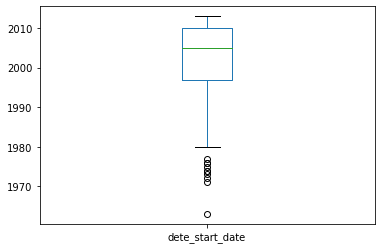

In [16]:
dete_resignations['dete_start_date'].plot(kind='box')

There aren't any obvious incorrect values in the dete_start_date column. Next we will inspect the cease_date column in tafe_resignation data.

<AxesSubplot:>

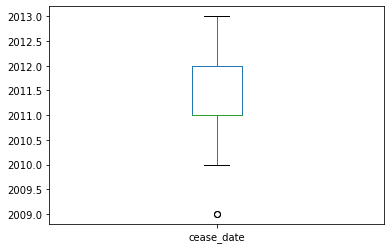

In [17]:
tafe_resignations['cease_date'].plot(kind='box')

There aren't any obvious incorrect values.

## Create a New Column

The next step involves creating a new calculated column in the dete_resignation dataset by subtracting the cease_date with the dete_start_date.

In [18]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

We have successfully created the institute_service column in the dete_resignation dataframe.

## Identify Dissatisfied Employees

Next step is to identify the dissatisfied employees. We need to employ different processes for each of the datasets due to the different data structure of the columns. The disatisfaction column in the dete_survey data is in boolean, however they are in text for the tafe_survey dataset. Since it is much easier working with boolean dataset, we will convert the text columns into a boolean column. First we will inspect the values in the those columns:

In [19]:
display(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts().to_frame())
display(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts().to_frame())

,Contributing Factors. Dissatisfaction
-,277
Contributing Factors. Dissatisfaction,55


,Contributing Factors. Job Dissatisfaction
-,270
Job Dissatisfaction,62


As we can see, there are only two values in each column, with "-" meaning False. We will define a function which will handle the re-assignment of those text values into boolean values.

In [20]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
335,False,False
336,False,False
337,False,False
338,False,False


Next we will create a dissatisfied column within the tafe_resignation dataframe where there is some indication that the employee resigned due to dissatisfaction. We will use the [DataFrame.any()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.any.html) which will return True if any of the elements is True and False otherwise, and returns NaN if the value is NaN.

In [21]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

The resulting columns will have a higher number of True values compared to the individual columns.

Before moving on we will save the DataFrame.

In [23]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the Data

We will now combine the datasets. Firstly we will create a new 'institute' column to label the row with the original dataset it belonged to for easier identification. Next we will combine the dataset using the [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function, to stack the datasets on top of each other, this allows for easier aggregation. Another useful property of combining the dataset this way is that columns that has the same name will properly join together, uncommon columns will have lots of null values which we will drop. We will inspect the result by inspecting the number of non-null values within each column.

In [24]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
separationtype                                         651
institute                                              651
dissatisfied                                           643
cease_date                                             635
age                                                    596
institute_service                                      563
Institute                                              340
WorkArea                                               340
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. NONE                             332
Contributing Factors. Dissatisfaction                  332
Contributing Factors. Other                            332
Contributing Factors. Travel                           332
Contributing Factors. Study                            332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Career Move - Public Sector      3

As we can see, the columns necessary for our analysis has more than 563 non-null values. We will set the threshold to drop the columns to be 500. Then we will inspect the institute_service column to check the list of unique values for that column.

In [25]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated['institute_service'].value_counts(dropna=False).to_frame()

,institute_service
NaN,88
Less than 1 year,73
1-2,64
3-4,63
5-6,33
11-20,26
5.0,23
1.0,22
7-10,21
3.0,20


As we can see the institute services contains a mix of numerical and text values. 

## Clean the Service Column

Next step involves cleaning the institute service column to ensure every value is a float. Doing this makes it easier to perform numerical operations, such as numerical comparisons, using this column. 

The goal of this section is to categorise the years of services into these categories:

- New: 0-3 Years Tenure
- Experienced: 3-6 Years Tenure
- Established: 7-10 Years Tenure
- Veteran: 10+ Years Tenure

Fortunately, we have not been presented with categories which are in between the categories we want. So we can simply extract the first numeric value from the string. Before we can do this, we need to cast the column as a string before we can utilise the string methods. Then after we have extracted the values, we will cast the results back into a number. Afterwards, we will inspect the results of our extraction.

In [26]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service_num'] = combined_updated['institute_service'].str.extract(r'(\d{1,2})')
combined_updated['institute_service_num'] = combined_updated['institute_service_num'].astype(float)
combined_updated[['institute_service','institute_service_num']]

,institute_service,institute_service_num
0,7.0,7.0
1,18.0,18.0
2,3.0,3.0
3,15.0,15.0
4,3.0,3.0
...,...,...
335,5-6,5.0
336,1-2,1.0
337,nan,NaN
338,5-6,5.0


We are now ready to define each of the tenure categories. We will do this by defining a function and then use the [DataFrame.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method to apply this function across every value and then assign the result to a new column in the DataFrame.

In [27]:
def catagorise(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New (0-3 Years Tenure)'
    elif val < 7:
        return 'Experienced (3-6 Years Tenure)'
    elif val < 11:
        return 'Established (7-10 Years Tenure)'
    else:
        return 'Veteran (10+ Years Tenure)'
    
combined_updated['service_cat'] = combined_updated['institute_service_num'].apply(catagorise)
combined_updated['service_cat'].value_counts(dropna=False)

New (0-3 Years Tenure)             193
Experienced (3-6 Years Tenure)     172
Veteran (10+ Years Tenure)         136
NaN                                 88
Established (7-10 Years Tenure)     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

Lastly we will fill in the missing values in the dissatisfied column with the most common value.

In [28]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

This value happens to be "False".

In [29]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

For the last part of our analysis, we will create a PivotTable to calculate the percentage of dissatisfied employees by service category. Since True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. We will also format the values to be percentages so it easier to read. While we can inspect the PivotTable to answer the question, it is much more efficient to do through visualisation. 

In [30]:
combined_updated.pivot_table(values='dissatisfied', index='service_cat', margins=True).apply(lambda x: round(x*100,2))

,dissatisfied
service_cat,
Established (7-10 Years Tenure),51.61
Experienced (3-6 Years Tenure),34.30
New (0-3 Years Tenure),29.53
Veteran (10+ Years Tenure),48.53
All,38.01


<AxesSubplot:title={'center':'Percentage of Dissatisfied Employees by Institute Service Category'}, xlabel='Institute Service Category', ylabel='Percentage'>

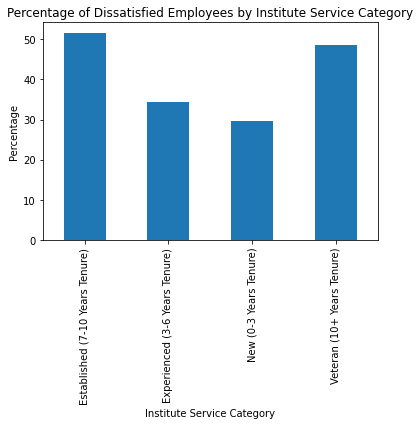

In [31]:
service_cat_pivot = combined_updated.pivot_table(values='dissatisfied', index='service_cat').apply(lambda x: round(x*100,2))
service_cat_pivot.plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Institute Service Category', xlabel = 'Institute Service Category', ylabel='Percentage')

We can see that employees who are employed longer are more likely to resign due to dissatisfaction. This is understandable as employees who have worked in the institute for a longer period of time would have a greater chance to build up dissatisfaction towards the employer over time.

## Aggregation by Age

Next we will conduct the same analysis using the age column. Starting by inspecting the unique values in the age column.

In [32]:
combined_updated['age'].value_counts(dropna=False).to_frame()

,age
51-55,71
NaN,55
41-45,48
41 – 45,45
46-50,42
36-40,41
46 – 50,39
26-30,35
21 – 25,33
26 – 30,32


Fortunately the age data for both datasets are in similar 5 year age brackets. This means we can categorise the ages using the below categories:

- 20 or younger
- 21 to 25
- 26 to 30
- 31 to 35
- 36 to 40
- 41 to 45
- 46 to 50
- 51 to 55
- 56 or older

To do this we will extract the first two digit number from the values and then define a function to categorise the data.

In [33]:
combined_updated['age'] = combined_updated['age'].astype('str')
combined_updated['age_num'] = combined_updated['age'].str.extract(r'(\d{1,2})')
combined_updated['age_num'] = combined_updated['age_num'].astype(float)

def catagorise_age(val):
    if pd.isnull(val):
        return np.nan
    elif val < 21:
        return '20 or younger'
    elif val < 26:
        return '21 to 25'
    elif val < 31:
        return '26 to 30'
    elif val < 36:
        return '31 to 35'
    elif val < 41:
        return '36 to 40'
    elif val < 46:
        return '41 to 45'
    elif val < 51:
        return '46 to 50'
    elif val < 56:
        return '51 to 56'
    else:
        return '56 or older'

combined_updated['age_cat'] = combined_updated['age_num'].apply(catagorise_age)
combined_updated['age_cat'].value_counts(dropna=False).sort_index()

20 or younger    10
21 to 25         62
26 to 30         67
31 to 35         61
36 to 40         73
41 to 45         93
46 to 50         81
51 to 56         71
56 or older      78
NaN              55
Name: age_cat, dtype: int64

Next we will display the PivotTable along with the bar graph.

In [34]:
combined_updated.pivot_table(values='dissatisfied', index='age_cat', margins=True).apply(lambda x: round(x*100,2))

,dissatisfied
age_cat,
20 or younger,20.00
21 to 25,30.65
26 to 30,41.79
31 to 35,37.70
36 to 40,34.25
41 to 45,37.63
46 to 50,38.27
51 to 56,42.25
56 or older,42.31


<AxesSubplot:title={'center':'Percentage of Dissatisfied Employees by Age Bracket'}, xlabel='Age Bracket', ylabel='Percentage'>

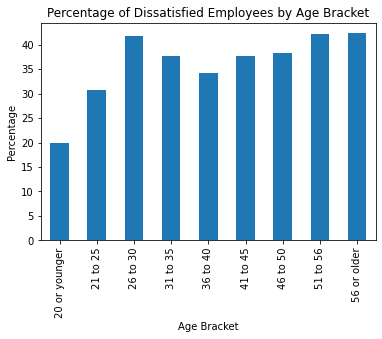

In [35]:
age_cat_pivot = combined_updated.pivot_table(values='dissatisfied', index='age_cat').apply(lambda x: round(x*100,2))
age_cat_pivot.plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Age Bracket', xlabel = 'Age Bracket', ylabel='Percentage')

Older employees tends to be resigning due to some dissatisfaction. This is in line with our previous analysis, since older employees tends to have a longer tenure at the company. However it should be noted that there is a spike in employee dissatisfaction in the 26 to 30 and 31 to 35 age bracket, we will try to find an explanation for this in the next section.

## Exploring the Dissatisfaction Spike

First we will analyse the dissatisfaction rate between DETE and TAFE.

<AxesSubplot:title={'center':'Percentage of Dissatisfied Employees by Institute'}, xlabel='Institute', ylabel='Percentage'>

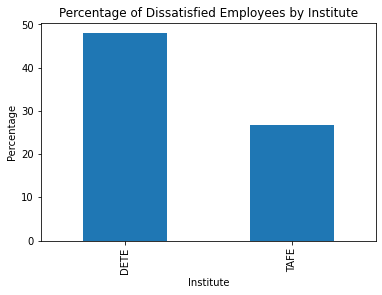

In [36]:
ins_cat_pivot = combined_updated.pivot_table(values='dissatisfied', index='institute').apply(lambda x: round(x*100,2))
ins_cat_pivot.plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Institute', xlabel = 'Institute', ylabel='Percentage')

Employees is more likely to resign dissatisfied in the DETE institute compared the TAFE institute by a large margin. This is expected since there are more categories related to dissatisfaction in the DETE institute dataset, so there is a higher chance that there will be some indication of dissatisfaction. The impact of this for our analysis is that this could skew the results of our analysis. We will analyse the pattern of dissatisfaction rates for each of the institutes.

<AxesSubplot:title={'center':'Percentage of Dissatisfied Employees by Service Cat'}, xlabel='TAFE', ylabel='Percentage'>

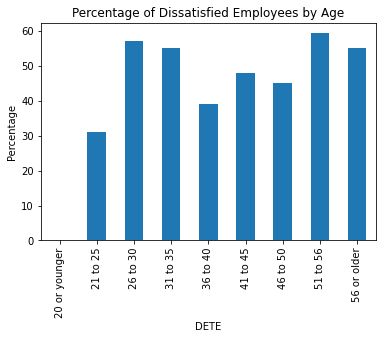

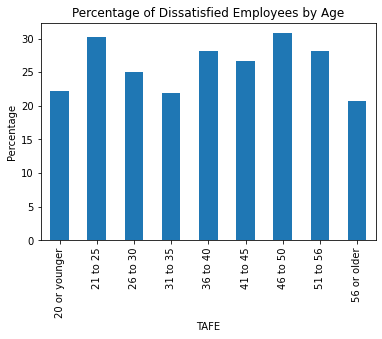

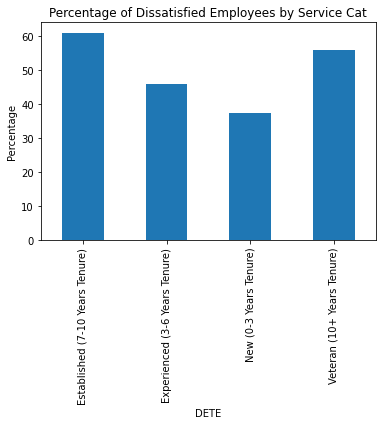

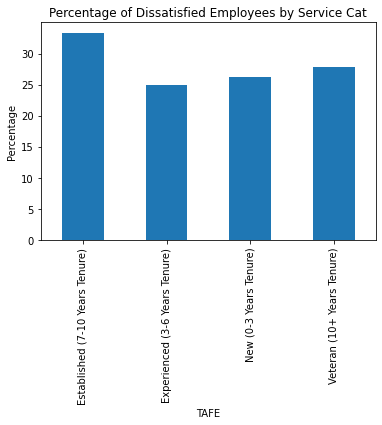

In [37]:
cleaned_dete = combined_updated[combined_updated['institute'] == 'DETE']
cleaned_tafe = combined_updated[combined_updated['institute'] == 'TAFE']
cleaned_dete.pivot_table(values='dissatisfied', index='age_cat').apply(lambda x: round(x*100,2)).plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Age', xlabel = 'DETE', ylabel='Percentage')
cleaned_tafe.pivot_table(values='dissatisfied', index='age_cat').apply(lambda x: round(x*100,2)).plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Age', xlabel = 'TAFE', ylabel='Percentage')
cleaned_dete.pivot_table(values='dissatisfied', index='service_cat').apply(lambda x: round(x*100,2)).plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Service Cat', xlabel = 'DETE', ylabel='Percentage')
cleaned_tafe.pivot_table(values='dissatisfied', index='service_cat').apply(lambda x: round(x*100,2)).plot(kind='bar', legend=False, title = 'Percentage of Dissatisfied Employees by Service Cat', xlabel = 'TAFE', ylabel='Percentage')

We observe similar dissatisfaction patterns by Service Category in both institutes. However, there are large differences in dissatisfaction patterns by Age Category. There is also a spike in dissatisfaction patterns in the dete_survey data which corresponds to the spike observed in the overall dataset. 

An explanation to this spike comes from the data we used in dete_survey dataset. Recall that we used the below columns in our anlaysis:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

These categories applies more towards the 26 to 35 year olds compared to 36 to 50 year olds, especially the lack of recognition. 

# Conclusion

To answer the questions we have set out at the start:

- Employees who worked for the company for a longer period of time are resigning due to some sort of dissatisfaction
- Older employees tends to resign due to some dissatisfaction, with a major spike in the 26 to 30 and 31 to 35 age brackets